# Introduction to Scikit-Learn

### machine-learning workflow

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

# 0. An end-to-end Scikit-Learn workflow

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Creating X (feature matrix):
x=heart_disease.drop(columns="target")
# creating y labels;
y=heart_disease["target"]

## Using ExtraTreesClassifier Model

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
from sklearn.model_selection import train_test_split
np.random.seed(5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
etc.fit(x_train,y_train)
etc.score(x_test,y_test)

0.9016393442622951

In [5]:
## now improving model by tuning parameters
np.random.seed(5)
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
from sklearn.metrics import accuracy_score,precision_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV
grid={"n_estimators":[50,60,100,200,300],"max_depth":[None,2,4],"max_features":[None,"sqrt","log2"],
      "min_samples_split":[2,4,6],"min_samples_leaf":[1,2,4],"max_samples":[None,1,4],"bootstrap":[True]}

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

rf=RandomizedSearchCV(etc,param_distributions=grid,n_iter=100,cv=5)
rf.fit(x_train,y_train)
rf

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 2, 4],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_samples': [None, 1, 4],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 60, 100, 200,
                                                         300]})

In [6]:
rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_samples': None,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

In [8]:
y_preds=rf.predict(x_test)
rf.score(x_test,y_test),accuracy_score(y_test,y_preds),precision_score(y_test,y_preds),mean_absolute_error(y_test,y_preds)

(0.8852459016393442, 0.8852459016393442, 0.875, 0.11475409836065574)

In [9]:
# 2.choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
# we will keep this classifier parameters default
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [12]:
#training the data
np.random.seed(42)
clf.fit(x_train,y_train);

In [13]:
# predicting the new data with training data
y_label=clf.predict(np.random.rand(242,13))

/users/gunuruchaitanyakumar/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
y_preds=clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [15]:
y_test

52     1
70     1
22     1
160    1
9      1
      ..
74     1
6      1
269    0
137    1
7      1
Name: target, Length: 61, dtype: int64

In [16]:
# 4 Evaluating the  model on training and test data
clf.score(x_train,y_train)


1.0

In [19]:
clf.score(x_test,y_test)

0.7377049180327869

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.78      0.78      0.78        37

    accuracy                           0.74        61
   macro avg       0.73      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [20]:
confusion_matrix(y_test,y_preds)

array([[16,  8],
       [ 8, 29]])

In [21]:
accuracy_score(y_test,y_preds)

0.7377049180327869

In [22]:
# improve model
np.random.seed(32)
# try to check different estimators
for i in range(10,100,10):
    print(f"trying model with {i}th estimator")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy score {clf.score(x_test,y_test)*100:.2f}%")
    print("")
    
    

trying model with 10th estimator
accuracy score 77.05%

trying model with 20th estimator
accuracy score 75.41%

trying model with 30th estimator
accuracy score 77.05%

trying model with 40th estimator
accuracy score 75.41%

trying model with 50th estimator
accuracy score 77.05%

trying model with 60th estimator
accuracy score 75.41%

trying model with 70th estimator
accuracy score 70.49%

trying model with 80th estimator
accuracy score 80.33%

trying model with 90th estimator
accuracy score 78.69%



In [23]:
# 6. save model and load it
import pickle
pickle.dump(clf,open("data/random_forest_model.pkl","wb"))


In [24]:
loaded_data=pickle.load(open("data/random_forest_model.pkl","rb"))
loaded_data.score(x_test,y_test)

0.7868852459016393

In [25]:
import warnings
warnings.filterwarnings("ignore")

# 0. An end to end SciKit-Learn workflow

In [26]:
#importing standard libs on top 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 1. Getting our Data ready to be used with machine learning
Three main things we have to do:
1. Split the data into features and labels(usually `x` and `y`)
2. Filling (also called imputing) or disregarding the empty values.
3. converting non-numerical values into numerical values (also called feature encoding).

In [28]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# creating feature variable
x=heart_disease.drop("target",axis=1)
# creating label
y=heart_disease["target"]

In [30]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [32]:
# Spliting the data into training data and test data
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Data clean --> Transfrom --> Reduce

### 1.1 Make sure all data must be in numerical

In [34]:
car_sales=pd.read_csv("Scikit-Learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [35]:
# Split data into x/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]
# training  and testing the data
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [40]:
# transforming the data into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot=OneHotEncoder()
categorical_features=["Make","Colour","Doors"]


In [43]:
transformer=ColumnTransformer([("one",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)

In [44]:
pd.DataFrame(transformed_x)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
np.random.seed(42)
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [50]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3235867221569877

In [51]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(dummies,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2920788538619685

In [61]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
np.random.seed(42)
clf.score(x_test,y_test)
## Result is ZERO because the data is numerical value its not classifier data

0.0

### 1.2 Dealing with missing data
1. filling the missing data 
2. removing the missing data

#### option1. by using pandas method

In [67]:
car_sales_missing=pd.read_csv("Scikit-Learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [68]:
#splitting the data into x/y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot=OneHotEncoder()
ct=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformded_x=ct.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformded_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: Input y contains NaN.

In [70]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
car_sales_missing.Make.value_counts(),car_sales_missing.Colour.value_counts(),car_sales_missing.Doors.value_counts()

(Make
 Toyota    379
 Honda     292
 Nissan    183
 BMW        97
 Name: count, dtype: int64,
 Colour
 White    390
 Blue     302
 Black     95
 Red       88
 Green     75
 Name: count, dtype: int64,
 Doors
 4.0    811
 5.0     75
 3.0     64
 Name: count, dtype: int64)

## filling the data

In [72]:
# filling na of Make column
car_sales_missing["Make"].fillna("missing",inplace=True)
#filling na of Colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# filling na of Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
# filling na of doors column
car_sales_missing["Doors"].fillna(4,inplace=True)

#### Removing data , where price contains na

In [73]:
car_sales_missing.dropna(inplace=True)

In [74]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [75]:
#splitting the data into x/y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [78]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot=OneHotEncoder()
ct=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformded_x=ct.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformded_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22011714008302485

## option 2. filling and removing the data using scikit-learn

In [84]:
car_sales_missing=pd.read_csv("Scikit-Learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [85]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing.Price

In [86]:
# imputing the data using sklearn
from sklearn.impute import SimpleImputer ## used to fill nan place
from sklearn.compose import ColumnTransformer
#filling the value by using imputere of particular type via different value type
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#columntransformer 
ct=ColumnTransformer([("cat_imputer",cat_imputer,["Make","Colour"]),("door_imputer",door_imputer,['Doors']),
                      ("num_imputer",num_imputer,["Odometer (KM)"])],verbose=0)
transformed_x=ct.fit_transform(x)
transformed_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [87]:
transformed_x=pd.DataFrame(transformed_x,columns=["Make","Colour","Doors","Odometer (KM)"])
transformed_x

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [88]:
transformed_x.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [90]:
np.random.seed(2)
ct=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
filled_x=ct.fit_transform(transformed_x)
x_train,x_test,y_train,y_test=train_test_split(filled_x,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3286463671229548

## Exact Workflow is
first split the data into training data and test data
then fill the data separately
then transform the data 

In [91]:

np.random.seed(42)
car_sales_missing=pd.read_csv("Scikit-Learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.dropna(subset=["Price"],inplace=True)
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing.Price
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
model=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0
...,...,...,...,...
106,Toyota,NaN,218803.0,4.0
277,BMW,Blue,245427.0,5.0
904,Toyota,White,196225.0,4.0
450,Honda,Blue,133117.0,NaN


In [92]:
from sklearn.impute import SimpleImputer
cat_imputert=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
one_hot=OneHotEncoder()
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("cat_imputer",cat_imputer,["Make","Colour"]),("door_imputer",door_imputer,["Doors"]),
                      ("num_imputer",num_imputer,["Odometer (KM)"])])
x_train_fill=ct.fit_transform(x_train)
x_test_fill=ct.fit_transform(x_test)


In [93]:
x_train_fill

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [94]:
x_train_fill=pd.DataFrame(x_train_fill,columns=["Make","Colour","Doors","Odometer (KM)"])
x_test_fill=pd.DataFrame(x_test_fill,columns=["Make","Colour","Doors","Odometer (KM)"])
ct=ColumnTransformer([("one_hot",one_hot,categorical_features)])
x_train_trans=ct.fit_transform(x_train_fill)
x_test_trans=ct.fit_transform(x_test_fill)

In [97]:
np.random.seed(42)
model.fit(x_train_trans,y_train)
model.score(x_test_trans,y_test)

0.08787238417429777

# 2 Choosing the right Estimator /algorithm for the data set
* Classification -- for predicting whether the sample is one thing or the another
* Regressot -- for predicting the numerical value

In [99]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22)
raw_df

HTTPError: HTTP Error 404: Not Found

In [100]:
from sklearn.datasets import load_iris
iris=load_iris()
iris_df=pd.DataFrame(iris["data"],columns=iris["feature_names"])
iris_df["target"]=iris["target"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [101]:
# lets try the Ridge regression model
from sklearn.linear_model import Ridge
model=Ridge()

In [102]:
#setup random seed
np.random.seed(42)
# create data
x=iris_df.drop("target",axis=1)
y=iris_df.target
# split the data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9440579987200235

## improving the result  or Evaluateing

In [103]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9980206677265501

<img src="Scikit-Learn-data/ml_map.svg"/>

## choosing the right estimator for classification data

In [104]:
from sklearn.svm import LinearSVC
ls=LinearSVC()
np.random.seed(42)
heart_disease=pd.read_csv("Scikit-Learn-data/heart-disease.csv")
x=heart_disease.drop("target",axis=1)
y=heart_disease.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.8688524590163934

In [105]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8360655737704918

In [65]:
len(heart_disease)

303

## 3. Fit the model to the data and make  predictions
3.1 Fitting the data using model.fit()

#### 3.2 Making predictions on our data
2 ways of predicting:
* 1.`predict()`
* 2. `predict_proba()`

In [106]:
from sklearn.svm import LinearSVC
ls=LinearSVC()
np.random.seed(42)
heart_disease=pd.read_csv("Scikit-Learn-data/heart-disease.csv")
x=heart_disease.drop("target",axis=1)
y=heart_disease.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.8688524590163934

In [107]:
ls.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [108]:
y_preds=ls.predict(x_test)

In [109]:
np.mean(y_preds==y_test)

0.8688524590163934

In [110]:
ls.score(x_test,y_test)

0.8688524590163934

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

### making predictions using predict_proba

In [112]:
rf.predict_proba(x_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

### making prediction for regression data

In [113]:
from sklearn.ensemble import RandomForestRegressor
x=iris_df.drop("target",axis=1)
y=iris_df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)
y_preds=model.predict(x_test)


In [114]:
y_preds[:10]

array([1., 0., 2., 0., 1., 2., 1., 2., 0., 0.])

In [115]:
np.array(y_test[:10])

array([1, 0, 2, 0, 1, 2, 1, 1, 0, 0])

In [116]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.11566666666666665

# 4. Evaluating the machine learning model
there are three ways to do so:
* Estimator `score()` method
* The `Scoring ` parameter
* Problem specific metric funcitons.

#### 4.1 Evaluating a model with score method

In [144]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
x=heart_disease.drop("target",axis=1)
y=heart_disease.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier().fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [141]:
# ## evaluating by score method for regression data

# np.random.seed(42)
# from sklearn.datasets import fetch_covtype
# home=fetch_covtype()
# home_df=pd.DataFrame(home["data"],columns=home["feature_names"])
# home_df.target=home.target
# home.feature_names

In [124]:
len(home_df.target)

581012

In [143]:
# np.random.seed(42)
# from sklearn.ensemble import RandomForestRegressor
# x=home_df.drop("target",axis=1)
# y=home_df.target
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# rf=RandomForestRegressor().fit(x_train,y_train)
# rf.score(x_test,y_test)

## 4.2 Evaluating a model using scoring parameter

## Cross-Validation

In [148]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x,y,cv=5)


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
clf.score(x_test,y_test),np.mean(cross_val_score(clf,x,y,cv=5))

(0.8524590163934426, 0.8116939890710382)

In [151]:
clf.score(x_test,y_test),np.mean(cross_val_score(clf,x,y,cv=42))

(0.8524590163934426, 0.8146258503401359)

### 4.2.1 classification model using metric

* 1. Accuracy
* 2. Area under ROC curve 
* 3. Confusion matrix 
* 4. Classification report 

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8360655737704918

In [153]:
print(f"Heart Disease classifier cross-validation Accuracy {np.mean(cross_val_score(clf,x,y,cv=5))*100:.2f}%")

Heart Disease classifier cross-validation Accuracy 82.15%


# Area under the Receiver Operating Charecteristics (AUC/ROC) curve

* Area under curve
* ROC curve

ROC curves are a comparison of a model's True positive rate(tpr) versus a model's False positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [154]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(x_test)
y_probs[:10]

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79],
       [0.16, 0.84],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.53, 0.47]])

In [155]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47])

In [156]:
y_test[:10],y_probs_positive[:10]

(179    0
 228    0
 111    1
 246    0
 60     1
 9      1
 119    1
 223    0
 268    0
 33     1
 Name: target, dtype: int64,
 array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47]))

In [157]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [158]:
len(thresholds)

27

In [159]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.24137931, 0.24137931, 0.31034483, 0.4137931 , 0.44827586,
       0.51724138, 0.55172414, 0.65517241, 0.68965517, 0.72413793,
       0.86206897, 1.        ])

In [160]:
thresholds

array([ inf, 0.99, 0.85, 0.81, 0.79, 0.7 , 0.66, 0.65, 0.64, 0.62, 0.59,
       0.55, 0.46, 0.41, 0.36, 0.35, 0.33, 0.24, 0.19, 0.16, 0.14, 0.13,
       0.1 , 0.09, 0.08, 0.05, 0.  ])

In [161]:
tpr

array([0.     , 0.0625 , 0.28125, 0.40625, 0.4375 , 0.59375, 0.65625,
       0.6875 , 0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625,
       0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ])

In [172]:
# Create function for plotting roc curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plotting a ROC curve for a given data of fpr versus tpr
    """
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,0,1],[0,1,1],color="aqua",linestyle="--",label="guessing")
    plt.legend()
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC/AUC curve")
    plt.show()

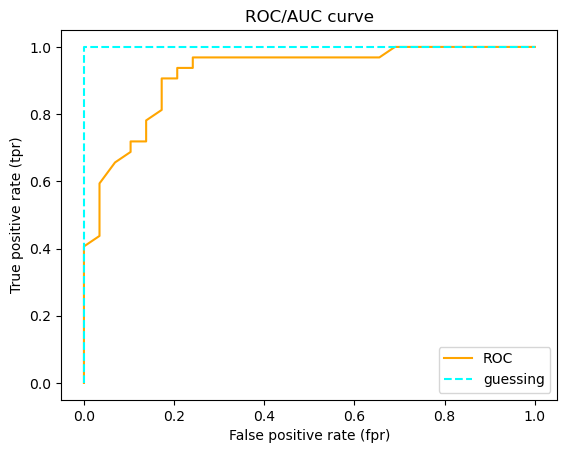

In [173]:
plot_roc_curve(fpr,tpr);

In [174]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9202586206896551

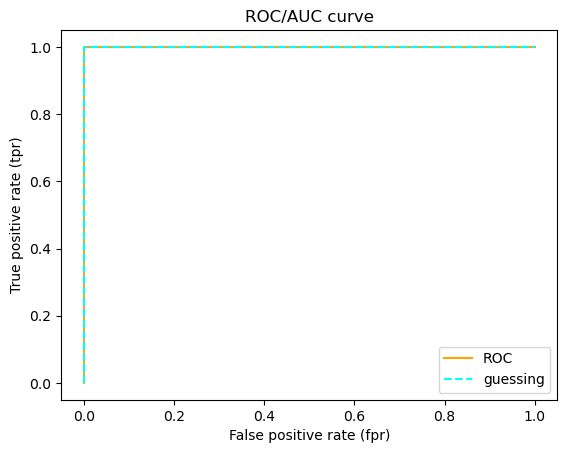

In [175]:
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

**confusion matrix**

In [176]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]])

In [177]:
pd.crosstab(y_test,y_preds,
           rownames=["Actual labels"]
           ,colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,5,27


In [100]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



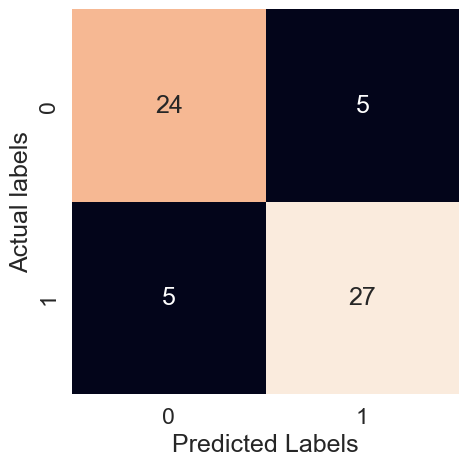

In [178]:
import seaborn as sns
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
cnf=confusion_matrix(y_test,y_preds)
ax=sns.heatmap(cnf,
               annot=True,
               cbar=False);
plt.xlabel("Predicted Labels")
plt.ylabel("Actual labels");

In [102]:
!pip install seaborn --upgrade

**classification Report**

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### To summarize classification metrics:
* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.

## Regression model evaluaiton metrics

* R^2  or co-efficient of determination
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

  **R^2**

In [180]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
model=load_iris()
model_df=pd.DataFrame(model["data"],columns=model["feature_names"])
model_df["target"]=model.target
x=model_df.drop("target",axis=1)
y=model_df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x_train,y_train)
y_preds=rf.predict(x_test)

In [182]:
r2_score(y_test,y_preds)

0.9097475247524752

In [183]:
rf.score(x_test,y_test)

0.9097475247524752

In [184]:
y_test_mean=np.full(len(y_test),y_test.mean())

In [185]:
r2_score(y_test,y_test_mean)

0.0

In [186]:
r2_score(y_test,y_test)

1.0

**Mean_Absolute_Error**

In [187]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.05333333333333334

In [188]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)

0.04051333333333333

### `scoring` parameter

In [189]:
from sklearn.model_selection import cross_val_score
cv_acc=cross_val_score(rf,x,y,scoring="neg_mean_absolute_error")

In [190]:
cv_acc

array([-0.        , -0.01866667, -0.143     , -0.06833333, -0.19      ])

In [191]:
cross_val_score(rf,x,y,scoring="f1")

array([ 0., nan, nan, nan, nan])

## Using different Evaluation metrics as scikit-learning functions

In [193]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(f" R^2 {r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE {mean_absolute_error(y_test,y_preds)*100:.2f}%")
print(f"MSE {mean_squared_error(y_test,y_preds)*100:.2f}%")

 R^2 90.97%
MAE 5.33%
MSE 4.05%


# 5. Improving a model
First predictions = baseline predictions.\
First model = baseline model.\
From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### Training hyperparameters by hand


Let's make three sets training, validation, and test.

In [194]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust:

`max_depth`\
`max_features`\
`min_samples_leaf`\
`min_samples_split`\
`n_estimators`

In [195]:
def evaluate_preds(y_true,y_preds):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metrics_dict={"accuracy":accuracy,"precision":precision,"recall":recall,"f1_score":f1}
    print(f"Accuracy {accuracy*100:.2f}%")
    print(f"precision {precision:.2f}")
    print(f"recall {recall:.2f}")
    print(f"f1_score {f1:.2f}")
    return metrics_dict

In [218]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
clf=RandomForestClassifier()
heart_disease=pd.read_csv("Scikit-Learn-data/heart-disease.csv")
heart_disease_shuffled=heart_disease.sample(frac=1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled.target

train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

clf.fit(x_train,y_train)
y_preds=clf.predict(x_valid)
base_line=evaluate_preds(y_valid,y_preds)

Accuracy 86.67%
precision 0.89
recall 0.81
f1_score 0.85


**changing n_estimator hyperparameter**

In [219]:
clf2=RandomForestClassifier(n_estimators=95,max_depth=90)
clf2.fit(x_train,y_train)
y_preds_2=clf2.predict(x_valid)
clf_2=evaluate_preds(y_valid,y_preds_2)

Accuracy 86.67%
precision 0.83
recall 0.90
f1_score 0.86


•HomePage: https://sites.google.com/view/manishg/ 

 

•Google Scholar: https://scholar.google.co.in/citations?user=eX9PSu0AAAAJ 

 

•LinkedIn: http://aka.ms/manishgupta

 

•YouTube (Data Science Gems): https://www.youtube.com/@dlByManish 



## Hyperparameters tuning using RandomizedSearchCV

In [220]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
grid={"n_estimators":[10,20,35,50,80,100],"max_depth":[None,2,6,8,22,34],"min_samples_leaf":[2,4,5,7,8],
                                    "min_samples_split":[2,3,5,6],"max_features":["log2","sqrt"]}
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=-1)
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,cv=5,n_iter=50,verbose=2)

rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=34, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=35; total time=   0.1s
[CV] END max_depth=34, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=34, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=34, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=34, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=35; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': [None, 2, 6, 8, 22, 34],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 5, 7, 8],
                                        'min_samples_split': [2, 3, 5, 6],
                                        'n_estimators': [10, 20, 35, 50, 80,
                                                         100]},
                   verbose=2)

In [221]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [222]:
rs_y_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy 88.52%
precision 0.89
recall 0.91
f1_score 0.90


In [223]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
grid={"n_estimators":[20,50,100],"max_depth":[2,5,34],"min_samples_leaf":[2,7,8],
                                    "min_samples_split":[2,3,6],"max_features":["log2","sqrt"]}
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=-1)
gs_clf=GridSearchCV(estimator=clf,param_grid=grid,cv=5,verbose=2)

gs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time= 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [2, 5, 34],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 7, 8],
                         'min_samples_split': [2, 3, 6],
                         'n_estimators': [20, 50, 100]},
             verbose=2)

In [224]:
gs_clf.best_params_

{'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 50}

In [225]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy 88.52%
precision 0.91
recall 0.88
f1_score 0.90


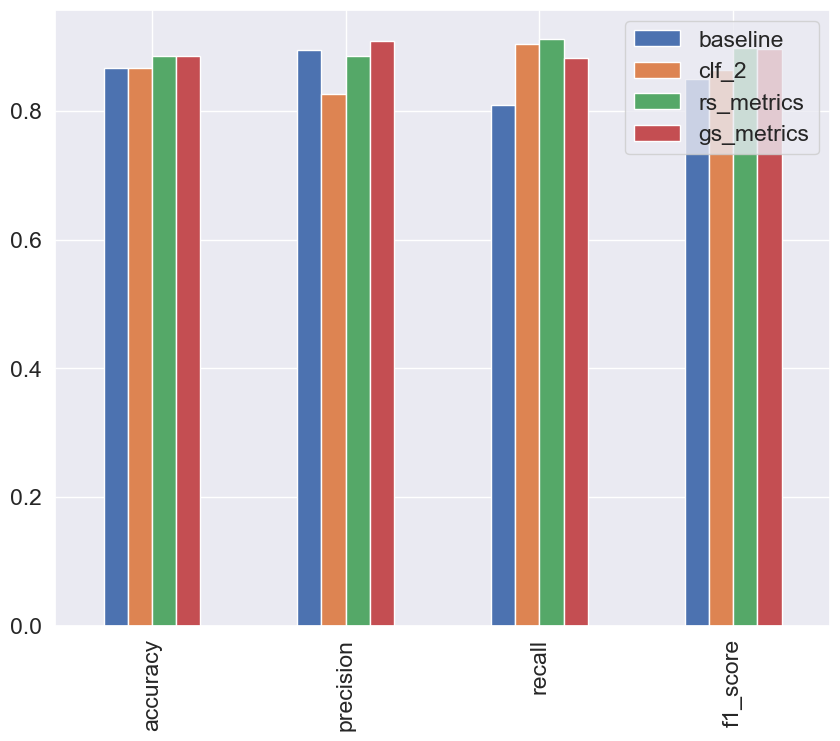

In [226]:
metrics_df=pd.DataFrame({"baseline":base_line,"clf_2":clf_2,"rs_metrics":rs_metrics,"gs_metrics":gs_metrics})
metrics_df.plot.bar(figsize=(10,8));

# Saving and loading model
There are 2 ways to do:

1.using python's `Pickle` module\
2. using `joblib` module

In [227]:
import pickle 
pickle.dump(gs_clf,open("gs_clf_data.pkl","wb"))

In [228]:
np.random.seed(42)
loaded_data=pickle.load(open("gs_clf_data.pkl","rb"))
loaded_y_preds=loaded_data.predict(x_test)

evaluate_preds(y_test,loaded_y_preds)

Accuracy 88.52%
precision 0.91
recall 0.88
f1_score 0.90


{'accuracy': 0.8852459016393442,
 'precision': 0.9090909090909091,
 'recall': 0.8823529411764706,
 'f1_score': 0.8955223880597015}

**joblib**

In [229]:
from joblib import dump,load
dump(gs_clf,"gs_clf_data.joblib")


['gs_clf_data.joblib']

In [230]:
load_file=load("gs_clf_data.joblib")
load_y=load_file.predict(x_test)
evaluate_preds(y_test,load_y)

Accuracy 88.52%
precision 0.91
recall 0.88
f1_score 0.90


{'accuracy': 0.8852459016393442,
 'precision': 0.9090909090909091,
 'recall': 0.8823529411764706,
 'f1_score': 0.8955223880597015}

# Putting all together!

In [231]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
np.random.seed(54)
# importing data
car_sales=pd.read_csv("Scikit-Learn-data/car-sales-extended-missing-data.csv")
car_sales.dropna(subset=["Price"],inplace=True)

# Getting data ready
x=car_sales.drop("Price",axis=1)
y=car_sales.Price

#data  filling ans transforming



cat_features=["Make","Colour"]
cat_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                         ("one_hot",OneHotEncoder())])
door_features=["Doors"]
door_transform=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

num_features=["Odometer (KM)"]
num_transform=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

ct=ColumnTransformer(transformers=[("cat",cat_trans,cat_features),("door",door_transform,door_features),("num",num_transform,num_features)])

# training the model
model=Pipeline(steps=[("ct",ct),("model",RandomForestRegressor())])
# x_transformed=ct.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model.fit(x_train,y_train)

# Predicting the model

y_preds=model.predict(x_test)

# scoring the model
def evaluate_preds(y_true,y_preds):
    r2=r2_score(y_test,y_preds)
    mae=mean_absolute_error(y_test,y_preds)
    mse=mean_squared_error(y_test,y_preds)
    metrics={"R^2 Score":(r2),"MAE":(mae),"MSE":(mse)}
    return metrics
score=evaluate_preds(y_test,y_preds)
print(score)
# improving the model
grid={"ct__num__imputer__strategy":["mean","median"],
      "model__n_estimators":[20,40,50,100],"model__max_depth":[2,6,8],
      "model__min_samples_split":[2,8,4],
      "model__max_features":["log2","sqrt"]}
gs_model=GridSearchCV(estimator=model,param_grid=grid,cv=5,verbose=2)




{'R^2 Score': 0.2250300929317003, 'MAE': 6019.09678832571, 'MSE': 56978961.007690854}


In [232]:
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ct__num__imputer__strategy=mean, model__max_depth=2, model__max_features=log2, model__min_samples_split=2, model__n_estimators=20; total time=   0.0s
[CV] END ct__num__imputer__strategy=mean, model__max_depth=2, model__max_features=log2, model__min_samples_split=2, model__n_estimators=20; total time=   0.0s
[CV] END ct__num__imputer__strategy=mean, model__max_depth=2, model__max_features=log2, model__min_samples_split=2, model__n_estimators=20; total time=   0.0s
[CV] END ct__num__imputer__strategy=mean, model__max_depth=2, model__max_features=log2, model__min_samples_split=2, model__n_estimators=20; total time=   0.0s
[CV] END ct__num__imputer__strategy=mean, model__max_depth=2, model__max_features=log2, model__min_samples_split=2, model__n_estimators=20; total time=   0.0s
[CV] END ct__num__imputer__strategy=mean, model__max_depth=2, model__max_features=log2, model__min_samples_split=2, model__n_estimators=40; to

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder())]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'ct__num__imputer__strategy': ['mean', 'median'],
                         'model__max_depth': [2, 6, 8],
                         'model__max_features': ['log2', 'sqrt'],
                         'model__min_samples_split': [2, 8, 4],
                         'model__n_estimators': [20, 40, 50, 100]},
             verbose=2)

In [233]:
gs_model.score(x_test,y_test)

0.3011728532258239

In [234]:
y_gs=gs_model.predict(x_test)

In [235]:
evaluate_preds(y_test,y_gs)

{'R^2 Score': 0.3011728532258239,
 'MAE': 5838.07232447936,
 'MSE': 51380633.472329594}